# Bank Customer's Churn Classification

Classifying bank customers based on their previous bank activities, that they will exit/leave the bank or not.

Dataset: https://www.kaggle.com/shrutimechlearn/churn-modelling

**Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Importing the dataset**

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

**Exploring the dataset**

In [3]:
dataset.shape

(10000, 14)

In [4]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Visualizing the count of 'Exited customers' from the dataset**

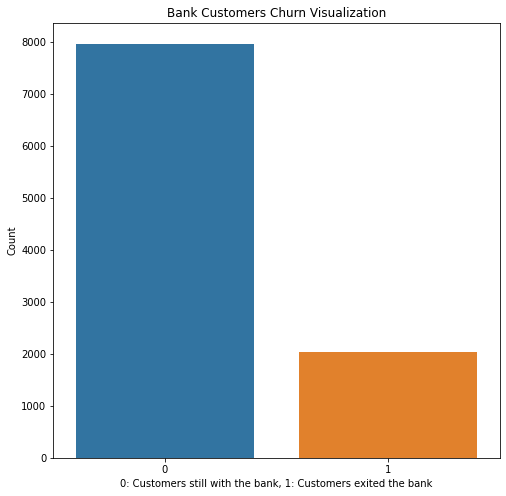

In [7]:
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=dataset)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [8]:
dataset.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [9]:
dataset.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Feature Engineering

**Create dummy variables**

In [10]:
geography=pd.get_dummies(dataset["Geography"],drop_first=True)
gender=pd.get_dummies(dataset['Gender'],drop_first=True)

In [11]:
df = pd.concat([dataset, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [12]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
X = df.drop('Exited', axis=1)
Y = df['Exited']

**Splitting the dataset into the Training set and Test set**

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print('X_train size: {}, X_test size: {}'.format(xtrain.shape, xtest.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# Building Artificial Neural Network (ANN)

**Importing the Keras libraries and packages**

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense

/home/varshita/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/varshita/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/varshita/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/varshita/.local/lib/python3.6/site-packag

**Initialising the ANN**

In [18]:
classifier = Sequential()

**Adding the input layer and the first hidden layer**

In [19]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

**Adding the second hidden layer**

In [20]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

**Adding the output layer**

In [21]:
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  """Entry point for launching an IPython kernel.


**Compiling the ANN**

In [22]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Fitting the ANN to the Training set**

In [23]:
model_history=classifier.fit(xtrain, ytrain,validation_split=0.33, batch_size = 10, nb_epoch = 100)

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.



Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 232us/step - loss: 0.6114 - accuracy: 0.7802 - val_loss: 0.5425 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 202us/step - loss: 0.5213 - accuracy: 0.7962 - val_loss: 0.5010 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 200us/step - loss: 0.4881 - accuracy: 0.7962 - val_loss: 0.4763 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 198us/step - loss: 0.4664 - accuracy: 0.7962 - val_loss: 0.4604 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 203us/step - loss: 0.4521 - accuracy: 0.7962 - val_loss: 0.4513 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 200us/step - loss: 0.4428 - accuracy: 0.7966 - val_loss: 0.4449 - val_accuracy: 0.7970
Epoch 7/100
5359/5359 [==============================] - 1s 203us/ste

5359/5359 [==============================] - 1s 195us/step - loss: 0.3351 - accuracy: 0.8602 - val_loss: 0.3658 - val_accuracy: 0.8455
Epoch 55/100
5359/5359 [==============================] - 1s 192us/step - loss: 0.3352 - accuracy: 0.8615 - val_loss: 0.3663 - val_accuracy: 0.8459
Epoch 56/100
5359/5359 [==============================] - 1s 197us/step - loss: 0.3349 - accuracy: 0.8606 - val_loss: 0.3657 - val_accuracy: 0.8466
Epoch 57/100
5359/5359 [==============================] - 1s 194us/step - loss: 0.3345 - accuracy: 0.8606 - val_loss: 0.3656 - val_accuracy: 0.8440
Epoch 58/100
5359/5359 [==============================] - 1s 194us/step - loss: 0.3340 - accuracy: 0.8614 - val_loss: 0.3655 - val_accuracy: 0.8440
Epoch 59/100
5359/5359 [==============================] - 1s 193us/step - loss: 0.3337 - accuracy: 0.8599 - val_loss: 0.3647 - val_accuracy: 0.8444
Epoch 60/100
5359/5359 [==============================] - 1s 196us/step - loss: 0.3331 - accuracy: 0.8597 - val_loss: 0.3658 

**List all data in history**

In [24]:
model_history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

**Summarize history for accuracy**

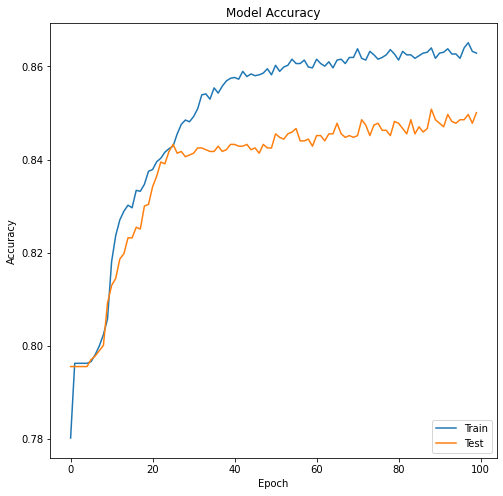

In [25]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

**Summarize history for loss**

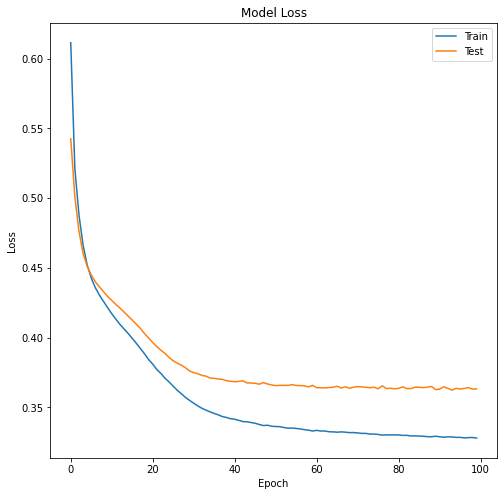

In [26]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Model Evaluation

**Predicting the Test set results**

In [27]:
ypred = classifier.predict(xtest)

In [28]:
ypred

array([[0.28349876],
       [0.33242565],
       [0.13210502],
       ...,
       [0.34723252],
       [0.1013971 ],
       [0.17424509]], dtype=float32)

In [29]:
ypred = (ypred > 0.5)
ypred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

**Confusion Matrix**

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[1526   69]
 [ 202  203]]


**Plotting confusion matrix**

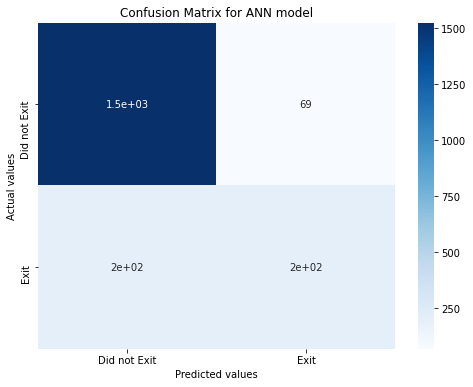

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

**Calculate the Accuracy**

In [32]:
from sklearn.metrics import accuracy_score
score = accuracy_score(ypred,ytest)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 86.45%


# Predictions

In [33]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
    sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
    sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
    sample_value = sc.transform(sample_value)

    return classifier.predict(sample_value)

In [34]:
# Predictions 1
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
    print('Prediction: High change of exit!')
else:
    print('Prediction: Low change of exit.')

Prediction: Low change of exit.


In [35]:
# Predictions 2
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
    print('Prediction: High change of exit!')
else:
    print('Prediction: Low change of exit.')

Prediction: High change of exit!
